In [2]:
import sympy as sym
import numpy as np
from sympy import pi, latex
from sympy.printing.mathml import mathml

import operator
import ipywidgets as widgets
from IPython.display import display, Latex, display_jpeg, Math, Markdown
sym.init_printing(use_latex=True) 

check_equation = lambda eq1, eq2: sym.simplify(eq1-eq2) == 0

def check_answer(variable_name, expected, comparison = operator.eq):
    output = widgets.Output()
    button = widgets.Button(description="Check answer")
    def _inner_check(button):
        with output:
            if comparison(globals()[variable_name], expected):
                output.outputs = [{'name': 'stdout', 'text': 'Correct!',
                                   'output_type': 'stream'}]
            else:
                output.outputs = [{'name': 'stdout', 'text': 'Incorrect!',
                                   'output_type': 'stream'}]
    button.on_click(_inner_check)
    display(button, output)

# SymPy in general

SymPy is a Python library for symbolic mathematics. You can use it as a tool to evaluate basic and complicated math operations, whenever they become tedious or error prone.

```{custom_download_link} ./sympy_stripped.ipynb
:replace_default: "True"
```


For example, SymPy is able to solve the differential equation $y'' - y = e^t$ for you!

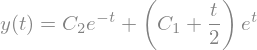

In [3]:
import sympy as sym
y = sym.Function('y')
t = sym.symbols('t')
sym.dsolve(sym.Eq(y(t).diff(t, t) - y(t), sym.exp(t)), y(t))

On this page, you'll get an introduction of the SymPy-basics. This introduction is derived from the introduction into SymPy from Jason Moore (CC-BY licensed) {cite}`jason_moore` and the SymPy Tutorial (Copyright (c) 2006-2023 SymPy Development Team) {cite}`sympy_why`.


## Why SymPy?
... and not Wolfram Alpha, Mathematica, Maple, GeoGebra, your fancy calculator, or ...?

> First off, SymPy is completely free. It is open source, and licensed under the liberal BSD license, so you can modify the source code and even sell it if you want to. This contrasts with popular commercial systems like Maple or Mathematica that cost hundreds of dollars in licenses.
>
> Second, SymPy uses Python. Most computer algebra systems invent their own language. Not SymPy. SymPy is written entirely in Python, and is executed entirely in Python. This means that if you already know Python, it is much easier to get started with SymPy, because you already know the syntax (and if you don’t know Python, it is really easy to learn). We already know that Python is a well-designed, battle-tested language. The SymPy developers are confident in their abilities in writing mathematical software, but programming language design is a completely different thing. By reusing an existing language, we are able to focus on those things that matter: the mathematics.
>
> Another computer algebra system, Sage also uses Python as its language. But Sage is large, with a download of over a gigabyte. An advantage of SymPy is that it is lightweight. In addition to being relatively small, it has no dependencies other than Python, so it can be used almost anywhere easily. Furthermore, the goals of Sage and the goals of SymPy are different. Sage aims to be a full featured system for mathematics, and aims to do so by compiling all the major open source mathematical systems together into one. When you call some function in Sage, such as integrate, it calls out to one of the open source packages that it includes. In fact, SymPy is included in Sage. SymPy on the other hand aims to be an independent system, with all the features implemented in SymPy itself.
>
> A final important feature of SymPy is that it can be used as a library. Many computer algebra systems focus on being usable in interactive environments, but if you wish to automate or extend them, it is difficult to do. With SymPy, you can just as easily use it in an interactive Python environment or import it in your own Python application. SymPy also provides APIs to make it easy to extend it with your own custom functions.
{cite}`sympy_why`

## First steps

Let’s take an example. Say we wanted to use the built-in Python functions to compute square roots. We might do something like this:

In [4]:
import math
math.sqrt(8)

Here we got an approximate result, which is not the exact square root of 8. If all we cared about was the decimal form of the square root of 8, we would be done.

But suppose we want to go further. Recall that $\sqrt{8} = \sqrt{ 4 \cdot 2} = 2 \sqrt{2}$
. We would have a hard time deducing this from the above result. This is where symbolic computation comes in. With a symbolic computation system like SymPy, square roots of numbers that are not perfect squares are left unevaluated by default

We'll import SymPy as follows:

In [5]:
import sympy as sym

Since SymPy works with mathematical symbols it's nice to view SymPy objects in
a format that is similar to the math in a textbook. Executing
`sym.init_printing()` at the beginning
of your Jupyter Notebook will ensure that SymPy objects render as typeset
mathematics.

In [4]:
sym.init_printing() 

Now we can apply SymPy to our simple root problem:

In [6]:
sym.sqrt(8)

It's not only exact, but also simplified!

## Variables
The use of computer algebra systems like SymPy is much more powerful, as they're able to compute expressions with variables.

We need to define variable explicitly, so that the correct object is created. For example, let's create two variables `x` and `y` representing $x$ and $y$:

In [7]:
x, y = sym.symbols('x y')

:::{card} Test yourself!
Review the [SymPy documentation](https://docs.sympy.org/latest/modules/core.html#sympy.core.symbol.var) and create symbols `q1`, `q2`, ... `q10` using `sym.var()` without providing a full list of `q1, q2, q3, q4, q5, q6, q7, q8, q9, q10`. Tip: `sym.var()` is an extension to `sym.symbols`.

Click {fa}`rocket` --> {guilabel}`Live Code` to activate live coding!
:::

In [ ]:
sym.var(   )

````{admonition} Answer
:class: tip, dropdown
```python
sym.var('q1:11')
```
````

## Expressions

Variables alone have little meaning, we need expressions to do some proper math. Let's define a symbolic expression, representing the mathematical expression $x + 2y$. The most basic way to construct expressions is with the standard Python operators `+`, `-`, `*`, `/`, and `**`. For example:

In [9]:
expr = x + 2*y
expr

Note that we wrote `x + 2*y` just as we would if `x` and `y` were ordinary Python variables. But in this case, instead of evaluating to something, the expression remains as just $x + 2y$. Now let us play around with it:

In [45]:
expr + 1

In [46]:
expr - x

Notice something in the above example. When we typed `expr - x`, we did not get $x + 2y - x$, but rather just $2y$. The $x$ and the $-x$ automatically canceled one another. This is similar to how $\sqrt{8}$ automatically turned into $2\sqrt{2}$ above. This isn’t always the case in SymPy;  Aside from obvious simplifications like $x - x = 0$ and $\sqrt{8} = 2\sqrt{2}$, most simplifications are not performed automatically. 

A general formula to simplify formulas is `sym.simplify`, which attempts to apply all of these functions in an intelligent way to arrive at the simplest form of an expression:

In [54]:
expr2 = sym.sin(x)**2+sym.cos(x)**2
expr2

In [55]:
sym.simplify(expr2)

Only attempt simplification on expressions that are several lines of text. Larger expressions become increasingly computationally intensive to simplify and there is generally no need to do so.

In many cases, our expressions include a left- and right-hand-side. We cannot use `==` for that (`==` checks the similarity of the python-object), but we can use the `sym.Eq` function to create the symbolic equality $x + 2y = 3$:

In [11]:
sym.Eq(expr,3)

When setting up these expressions, watch out! Be careful with numbers, as SymPy may not intepret them as expected. For example:

In [12]:
1/2*x

Python does the division before it is multiplied by `x`, thus a floating point value is created. To fix this you can use the `sym.S()` function to “sympify” numbers:

In [13]:
sym.S(1)/2*x

Or you can ensure the symbol comes first in the division operation:

In [14]:
x/2

:::{card} Test yourself!
Create an expression for the normal distribution function:

$$\frac{1}{\sqrt{2\pi\sigma}}e^{\frac{(x-\mu)^2}{2\sigma^2}}$$

All variables have been defined with:

```python
sym.var('x, sigma, mu')
```

Click {fa}`rocket` --> {guilabel}`Live Code` to activate live coding!
:::

In [15]:
sym.var('x, sigma, mu')
expr_correct = sym.exp((x-mu)**2/2/sigma**2)/sym.sqrt(2*sym.pi*sigma)
expr = 0

In [ ]:
expr = 

In [16]:
check_answer("expr",expr_correct, check_equation)

Button(description='Check answer', style=ButtonStyle())

Output()

## Functions

You will also work with undefined mathematical functions in addition to variables.
These will play an important role in setting up differential equations, where
you typically don't know the function, but only its derivative(s). You can
create arbitrary functions of variables. In this case, you make a function of
$x$. First create the function name:

In [17]:
f = sym.Function('f')

Now you can create functions of one or more variables like so:

In [18]:
f(x)

The same `UndefinedFunction` can be used to create multivariate functions:

In [19]:
f(x,y)

:::{card} Test yourself!
Create a function $H(x,y,z)$

All variables have been defined with:

```python
x, y, z = sym.symbols('x, y, z')
```

Click {fa}`rocket` --> {guilabel}`Live Code` to activate live coding!
:::

In [20]:
x, y, z = sym.symbols('x, y, z')
H = sym.Function('H')
function_correct = H(x,y,z)
function_answer = 0
H = None

In [ ]:
function = 

In [22]:
check_answer("function",function_correct, check_equation)

Button(description='Check answer', style=ButtonStyle())

Output()

## Evaluating expressions

SymPy expressions can be evaluated numerically in several ways. Let's say you have an expression defined as follows:

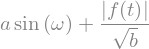

In [23]:
a, omega, b, t = sym.symbols('a, omega, b, t')
f = sym.Function('f')
expr3 = a*sym.sin(omega) + sym.Abs(f(t))/sym.sqrt(b)
expr3

And you have some values for which you want to evaluate of the expression:

In [24]:
values = {omega: sym.pi/4, a: 2, f(t): -12, b: 25}

You can evalute the expression using `sym.subs`:

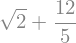

In [25]:
expr3.subs(values)

Notice how the square root and fraction do not automatically reduce to their decimal equivalents. To do so, you must use the `evalf()` method:

In [26]:
expr3.subs(values).evalf()

To obtain machine precision floating point numbers directly and with more flexibility, it is better to use the `sym.lambdify()` function to convert the expression to a Python function. When using `sym.lambdify()`, all symbols and functions should be converted to numbers, so first identify what symbols and functions make up the expression.

In [27]:
eval_expr3 = sym.lambdify((omega, a, f(t), b), expr3)

`sym.lambdify()` generates a Python function and, in this case, we store that function in the variable `eval_expr3`. You can see what the inputs and outputs of the function are with `help()`:

In [28]:
help(eval_expr3)

Help on function _lambdifygenerated:

_lambdifygenerated(omega, a, _Dummy_38, b)
    Created with lambdify. Signature:
    
    func(omega, a, f, b)
    
    Expression:
    
    a*sin(omega) + Abs(f(t))/sqrt(b)
    
    Source code:
    
    def _lambdifygenerated(omega, a, _Dummy_38, b):
        return a*sin(omega) + abs(_Dummy_38)/sqrt(b)
    
    
    Imported modules:



This function operates on and returns floating point values. However, it also support arrays of floats. For example:

In [29]:
eval_expr3(3.14/4, 2, -12, [25, 26, 27])

array([3.81365036, 3.76704398, 3.72305144])

:::{card} Test yourself!

Create a symbolic expression representing [Newton's Law of Universal Gravitation](https://en.wikipedia.org/wiki/Newton's_law_of_universal_gravitation). Use `sym.lambdify()` to evaluate the expression for two mass of 5.972E24 kg and 80 kg at a distance of 6371 km apart to find the gravitational force in Newtons. $G$ equals $6.67430\cdot 10 ^{-11}$

All variables have been defined with:
```python
G, m_1, m_2, r = sym.symbols('G, m_1, m_2, r')
```

Click {fa}`rocket` --> {guilabel}`Live Code` to activate live coding!
:::



In [30]:
from math import isclose
G, m_1, m_2, r = sym.symbols('G, m_1, m_2, r')
F = G*m_1*m_2/r**2
eval_F = sym.lambdify((G, m_1, m_2, r), F)
answer_correct = eval_F(6.67430E-11, 5.972E24, 80, 6371E3)
answer = 0

tolerance = 0.001
check_float = lambda a, b: isclose(a, b, rel_tol=0, abs_tol=tolerance)

In [104]:
answer = 

In [31]:
check_answer("answer",answer_correct, check_float)

Button(description='Check answer', style=ButtonStyle())

Output()

## Some examples

SymPy has many possibilities. Check out the [documentation](https://docs.sympy.org/latest/index.html) if you're curious. Some examples are shown below.

Take the derivative of $\sin\left({x}\right) e ^ x$

In [32]:
sym.diff(sym.sin(x)*sym.exp(x),x)

Compute $\int(e^x\sin{(x)} + e^x\cos{(x)})dx$.

In [33]:
sym.integrate(sym.exp(x)*sym.sin(x) + sym.exp(x)*sym.cos(x), x)

Compute $\int_{-\infty}^\infty \sin{(x^2)}dx$.

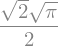

In [34]:
sym.integrate(sym.sin(x**2), (x, -sym.oo, sym.oo))

Find $\lim_{x\to 0}\frac{\sin{(x)}}{x}$.

In [35]:
sym.limit(sym.sin(x)/x, x, 0)

Solve $x^2 - 2 = 0$.

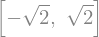

In [36]:
sym.solve(sym.Eq(x**2 - 2,0), x)

Find the eigenvalues of $\left[\begin{smallmatrix}1 & 2\\2 & 2\end{smallmatrix}\right]$.

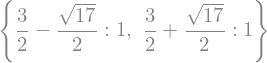

In [37]:
sym.Matrix([[1, 2], [2, 2]]).eigenvals()

Print $\int_{0}^{\pi} \cos^{2}{\left (x \right )} dx$ using $\mathrm{LaTeX}$.

In [38]:
sym.latex(sym.Integral(sym.cos(x)**2, (x, 0, sym.pi)))

'\\int\\limits_{0}^{\\pi} \\cos^{2}{\\left(x \\right)}\\, dx'

## Gotchas
Trial and error is an approach for many programmers, but you may want to prevent frequently made mistakes. Take a look at SymPy's documentation on [gotchas](https://docs.sympy.org/latest/tutorials/intro-tutorial/gotchas.html) to accelerate your learning!